Проект по Веб базирани системи, Септемвриска сесија 2022, изработено од Емил Петровски 181201

Овој проект е анализа на податочно множество за главни градови во Европа, преземено од https://dbpedia.org/page/Category:Capitals_in_Europe

Проектот опфаќа обработка на RDF податоци со помош на SPARQL query, анализа на добиените податоци преку разни Python библиотеки - Pandas, Matplotlib, Geopandas, Geopy

Импортирање на потребни пакети и библиотеки

In [ ]:
!pip install rdflib
!pip install sparqlwrapper

In [2]:
import sys
from rdflib import Graph
from SPARQLWrapper import SPARQLWrapper, JSON, N3
from pprint import pprint

In [3]:
import pandas as pd, urllib
from pandas.plotting import scatter_matrix

In [4]:
import matplotlib.pyplot as plt

In [5]:
pd.options.display.float_format = '{:,.0f}'.format

SPARQL query за прикажување на RDF податоци од податочното мнжество за главни градови во Европа (http://dbpedia.org/resource/Category:Capitals_in_Europe), и прикажување на следниве податоци во форма на csv табела со помош на Pandas:


*   Име на главниот град
*   Број на жители на главниот град
*   Име на државата
*   Број на жители во државата
*   Координати (посебна колона за латитуда и лонгитуда/ширина и должина)

---

За приказ на името на главниот град, се користи FOAF својството (`?capital foaf:name ?Capital_name`), за да ни го прикаже името на градот во чист текст, наместо како URL до ресурсот на DBpedia





In [ ]:
query = """
SELECT ?Capital_name ?Capital_population ?country ?Country_population  ?Latitude ?Longitude
WHERE{ 
?capital  dct:subject  <http://dbpedia.org/resource/Category:Capitals_in_Europe> ;
              dbo:populationTotal ?Capital_population ;
              foaf:name ?Capital_name ;
              dbo:country  ?country ;
              geo:lat ?Latitude ;
              geo:long ?Longitude .

?country dbo:populationTotal ?Country_population.
}
"""
endpoint = "http://dbpedia.org/sparql"

param = urllib.parse.urlencode({'default-graph-uri': 'http://dbpedia.org', 
                                'query': query, 
                                'format': 'text/csv'})

data = pd.read_csv(endpoint + '?' + param)
print(data)

Бришење дупликати, бидејќи не може да има повеќе од еден град на исти координати

In [ ]:
data = data.drop_duplicates(subset=['Latitude','Longitude'])
print(data)

Пренесување на csv податоците во csv датотека

In [8]:
data.to_csv('data.csv')

In [9]:
data[['Capital_name','Capital_population','country', 'Country_population', 'Latitude', 'Longitude']]

,Capital_name,Capital_population,country,Country_population,Latitude,Longitude
0,Westside,26572,http://dbpedia.org/resource/United_Kingdom,67081000,36,-5
1,Athens,664046,http://dbpedia.org/resource/Greece,10678632,38,24
2,Dublin,554554,http://dbpedia.org/resource/Republic_of_Ireland,5011500,53,-6
3,Prague,1335084,http://dbpedia.org/resource/Czech_Republic,10701777,50,14
6,Sarajevo,275524,http://dbpedia.org/resource/Bosnia_and_Herzego...,3824782,44,18
8,Stockholm,975819,http://dbpedia.org/resource/Sweden,10402070,59,18
9,Ljubljana,295504,http://dbpedia.org/resource/Slovenia,2108708,46,15
10,London,8961989,http://dbpedia.org/resource/United_Kingdom,67081000,52,-0
11,Zagreb,790017,http://dbpedia.org/resource/Croatia,3888529,46,16
14,Nicosia,55014,http://dbpedia.org/resource/Turkey,84680273,35,33


Scatter plot график помеѓу бројот на жители во главниот град и во државата, прикажан со помош на matplotlib (Интервал на секои 10 милиони жители)

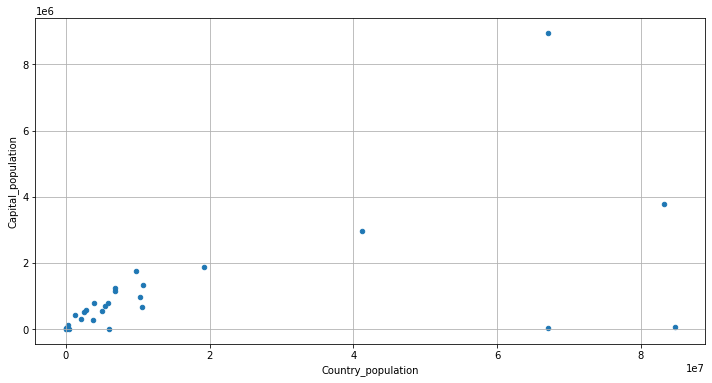

In [10]:
#Per 10 million
data.plot.scatter(x='Country_population', 
                  y='Capital_population',
                  figsize=(12,6),
                  grid='true',
                  style='o')

Хистограм на популацијата на главниот град и државата, за покажување на фреквентноста на популацијата

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9669cb7b10>,
      dtype=object)

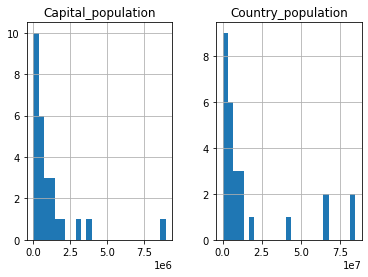

In [11]:
#Frequency
data.hist(['Capital_population', 'Country_population'], bins=25)

Бар график што прикажува број на популација на главен град и на државата, вредноста на секој интервал е на 10 милиони жители

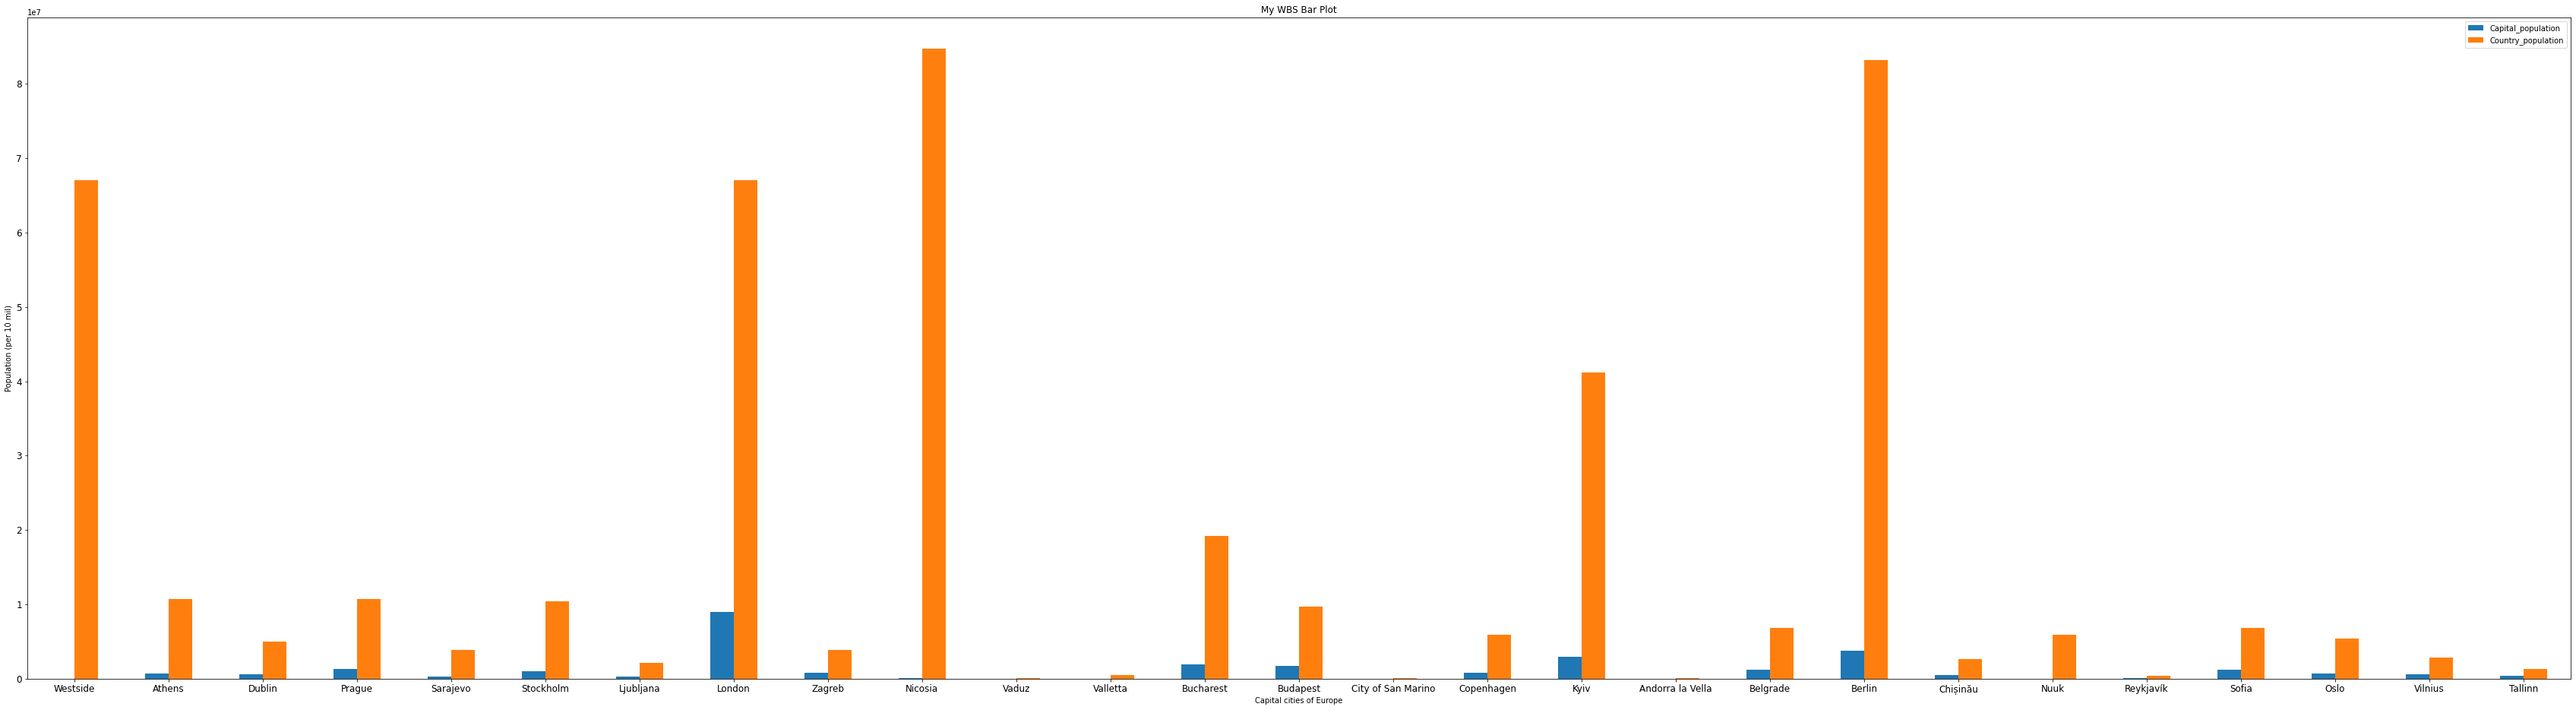

In [12]:
df = pd.read_csv('data.csv')
df.plot.bar(x='Capital_name',
            y=['Capital_population','Country_population'],
            rot=0, figsize=(60,16),
            title='My WBS Bar Plot', # Adding a title to the top
            xlabel="Capital cities of Europe", # Adding a label on the xaxis
            ylabel="Population (per 10 mil)", # Adding a label on y axis
            fontsize='large');

Матрични хистограми за популациите

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9668f91550>,
      dtype=object)

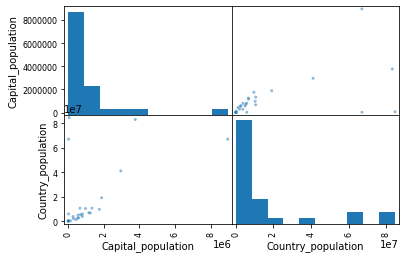

In [13]:
scatter_matrix(data[['Capital_population', 'Country_population']], diagonal='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9668e51410>,
      dtype=object)

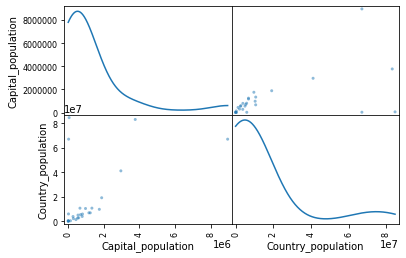

In [14]:
scatter_matrix(data[['Capital_population', 'Country_population']], diagonal='kde')

Scatter plot график за лонгитуда и латитуда на главните градови

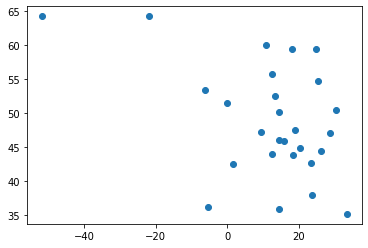

In [15]:
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

Инсталирање на пакети и библиотеки за приказ на главните градови на мапа според координати

In [ ]:
!apt install libspatialindex-dev
!pip install rtree
!pip install geopandas

In [17]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

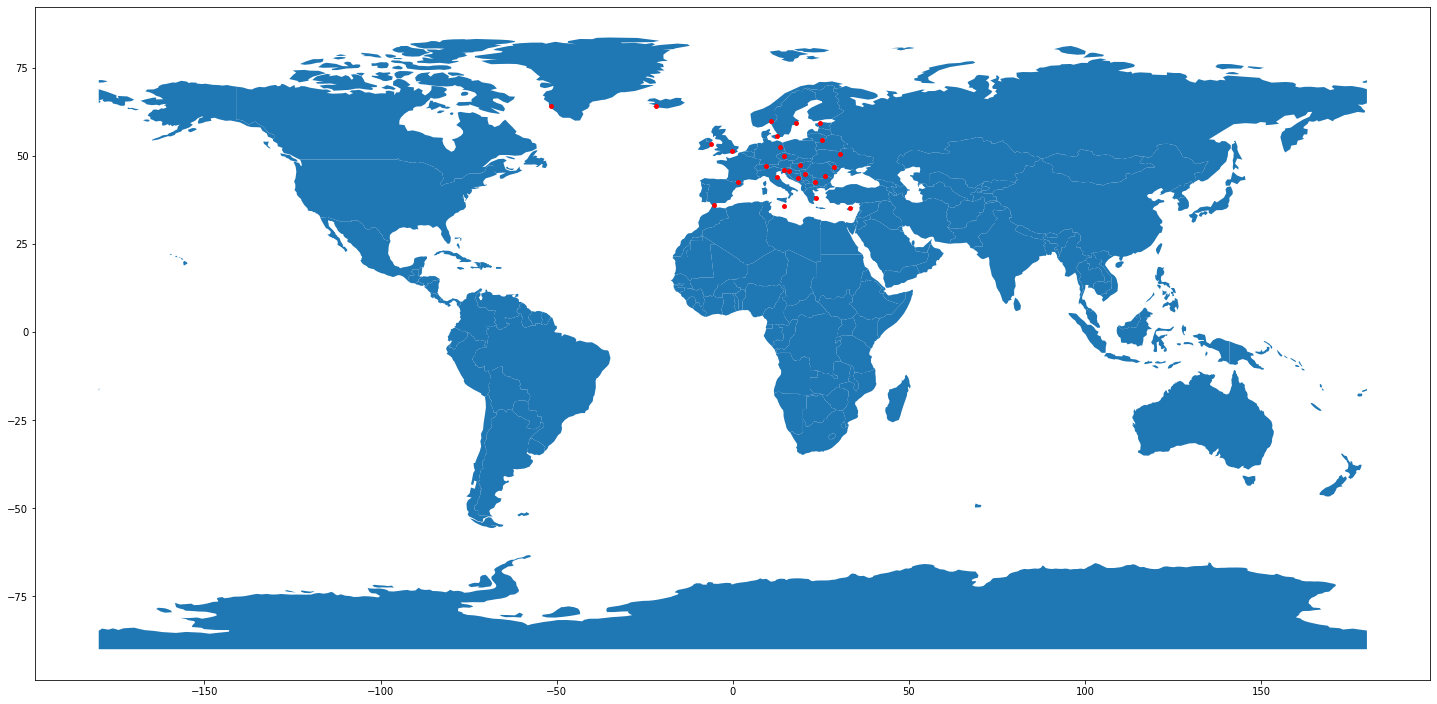

In [18]:
df = pd.read_csv("data.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(25, 18)), marker='o', color='red', markersize=15);

In [19]:
print (data[['Capital_name', 'Latitude', 'Longitude']])

          Capital_name  Latitude  Longitude
0             Westside        36         -5
1               Athens        38         24
2               Dublin        53         -6
3               Prague        50         14
6             Sarajevo        44         18
8            Stockholm        59         18
9            Ljubljana        46         15
10              London        52         -0
11              Zagreb        46         16
14             Nicosia        35         33
17               Vaduz        47         10
18            Valletta        36         15
19           Bucharest        44         26
20            Budapest        47         19
23  City of San Marino        44         12
24          Copenhagen        56         13
27                Kyiv        50         31
28    Andorra la Vella        42          2
29            Belgrade        45         20
31              Berlin        53         13
32            Chișinău        47         29
33                Nuuk        64

In [20]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Наоѓање на растојанието помеѓу два градови, според нивните координати

In [21]:
#Растојание на права линија
from geopy.distance import geodesic as GD

city1 = (44.8167,   20.46670)
city2 = (42.7000,   23.33000)

print("The distance between the two cities is: ", GD(city1,city2).km, "kilometers")

The distance between the two cities is:  329.3196303338761 kilometers


In [23]:
#Просек на население во секоја држава и секој главен град
df2 = data[["Country_population","Capital_population"]].mean()
print (df2)

Country_population   16,943,827
Capital_population    1,109,850
dtype: float64


In [24]:
import altair as alt

df = pd.read_csv('data.csv')

alt.layer(
    alt.Chart().mark_bar(color='#eee').encode(alt.X("ranges[2]:Q", scale=alt.Scale(nice=False), title=None)),
    alt.Chart().mark_bar(color='#ddd').encode(x="ranges[1]:Q"),
    alt.Chart().mark_bar(color='#ccc').encode(x="ranges[0]:Q"),
    alt.Chart().mark_bar(color='lightsteelblue', size=10).encode(x='measures[1]:Q'),
    alt.Chart().mark_bar(color='steelblue', size=10).encode(x='measures[0]:Q'),
    alt.Chart().mark_tick(color='black').encode(x='markers[0]:Q'),
    data=df
).facet(
    row="title:O"
).resolve_scale(
    x='independent'
)

alt.FacetChart(...)

In [32]:
from sklearn.cluster import KMeans,AgglomerativeClustering,AffinityPropagation
from sklearn.mixture import GaussianMixture

In [33]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [ ]:
datashort = data[['Capital_population','Country_population']]
print(datashort)

In [ ]:
clust_labels, cent = doKmeans(datashort, 5)
kmeans = pd.DataFrame(clust_labels)


datashort.insert((datashort.shape[1]),'kmeans',kmeans)
print(datashort)

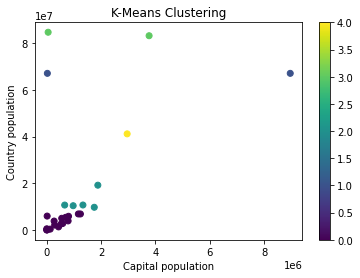

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(datashort['Capital_population'],
                     datashort['Country_population'],c=kmeans[0])
ax.set_title('K-Means Clustering')
ax.set_xlabel('Capital population')
ax.set_ylabel('Country population')
plt.colorbar(scatter)